In [0]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [2]:
google_mobility = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=e0c5a582159f5662')
google_mobility_US = google_mobility[google_mobility['country_region'] == 'United States']

google_mobility_US['sub_region_2'] = google_mobility_US['sub_region_2'] + ', ' + google_mobility_US['sub_region_1']

states_google_mobility_1 = pd.pivot_table(google_mobility_US,values=['retail_and_recreation_percent_change_from_baseline',
                                                                              'grocery_and_pharmacy_percent_change_from_baseline',
                                                                              'parks_percent_change_from_baseline',
                                                                              'transit_stations_percent_change_from_baseline',
                                                                              'workplaces_percent_change_from_baseline',
                                                                              'residential_percent_change_from_baseline'
                                                                              ],index=['sub_region_2'],columns='date').reset_index()

states_google_mobility_1['county_name'] = states_google_mobility_1['sub_region_2']

del states_google_mobility_1['sub_region_2']

states_google_mobility_1 = states_google_mobility_1.dropna()

mobility_combined = states_google_mobility_1['retail_and_recreation_percent_change_from_baseline'] + states_google_mobility_1['grocery_and_pharmacy_percent_change_from_baseline'] + states_google_mobility_1['transit_stations_percent_change_from_baseline'] + states_google_mobility_1['parks_percent_change_from_baseline'] + states_google_mobility_1['workplaces_percent_change_from_baseline'] + states_google_mobility_1['residential_percent_change_from_baseline']
mobility_combined = mobility_combined /6
mobility_combined['county_name'] = states_google_mobility_1['county_name']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [3]:
main_list = []


retail_and_recreation_percent_change_from_baseline_3 = states_google_mobility_1['retail_and_recreation_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(retail_and_recreation_percent_change_from_baseline_3)
retail_and_recreation_percent_change_from_baseline_2 = states_google_mobility_1['retail_and_recreation_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(retail_and_recreation_percent_change_from_baseline_2)
retail_and_recreation_percent_change_from_baseline_1 = states_google_mobility_1['retail_and_recreation_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(retail_and_recreation_percent_change_from_baseline_1)


grocery_and_pharmacy_percent_change_from_baseline_3 = states_google_mobility_1['grocery_and_pharmacy_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(grocery_and_pharmacy_percent_change_from_baseline_3)
grocery_and_pharmacy_percent_change_from_baseline_2 = states_google_mobility_1['grocery_and_pharmacy_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(grocery_and_pharmacy_percent_change_from_baseline_2)
grocery_and_pharmacy_percent_change_from_baseline_1 = states_google_mobility_1['grocery_and_pharmacy_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(grocery_and_pharmacy_percent_change_from_baseline_1)


parks_percent_change_from_baseline_3 = states_google_mobility_1['parks_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(parks_percent_change_from_baseline_3)
parks_percent_change_from_baseline_2 = states_google_mobility_1['parks_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(parks_percent_change_from_baseline_2)
parks_percent_change_from_baseline_1 = states_google_mobility_1['parks_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(parks_percent_change_from_baseline_1)


transit_stations_percent_change_from_baseline_3 = states_google_mobility_1['transit_stations_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(transit_stations_percent_change_from_baseline_3)
transit_stations_percent_change_from_baseline_2 = states_google_mobility_1['transit_stations_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(transit_stations_percent_change_from_baseline_2)
transit_stations_percent_change_from_baseline_1 = states_google_mobility_1['transit_stations_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(transit_stations_percent_change_from_baseline_1)


workplaces_percent_change_from_baseline_3 = states_google_mobility_1['workplaces_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(workplaces_percent_change_from_baseline_3)
workplaces_percent_change_from_baseline_2 = states_google_mobility_1['workplaces_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(workplaces_percent_change_from_baseline_2)
workplaces_percent_change_from_baseline_1 = states_google_mobility_1['workplaces_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(workplaces_percent_change_from_baseline_1)


residential_percent_change_from_baseline_3 = states_google_mobility_1['residential_percent_change_from_baseline'].iloc[:, -20 :].sum(axis=1)
main_list.append(residential_percent_change_from_baseline_3)
residential_percent_change_from_baseline_2 = states_google_mobility_1['residential_percent_change_from_baseline'].iloc[:, 38 :-20].sum(axis=1)
main_list.append(residential_percent_change_from_baseline_2)
residential_percent_change_from_baseline_1 = states_google_mobility_1['residential_percent_change_from_baseline'].iloc[:,18 :-40].sum(axis=1)
main_list.append(residential_percent_change_from_baseline_1)

main_dict = {'retail_and_recreation_percent_change_from_baseline_3':retail_and_recreation_percent_change_from_baseline_3, 
             'retail_and_recreation_percent_change_from_baseline_2':retail_and_recreation_percent_change_from_baseline_2,
             'retail_and_recreation_percent_change_from_baseline_1':retail_and_recreation_percent_change_from_baseline_1,
             'grocery_and_pharmacy_percent_change_from_baseline_3':grocery_and_pharmacy_percent_change_from_baseline_3,
             'grocery_and_pharmacy_percent_change_from_baseline_2':grocery_and_pharmacy_percent_change_from_baseline_2,
             'grocery_and_pharmacy_percent_change_from_baseline_1':grocery_and_pharmacy_percent_change_from_baseline_1,
              'parks_percent_change_from_baseline_3': parks_percent_change_from_baseline_3,
             'parks_percent_change_from_baseline_2':parks_percent_change_from_baseline_2,
             'parks_percent_change_from_baseline_1':parks_percent_change_from_baseline_1,
             'transit_stations_percent_change_from_baseline_3':transit_stations_percent_change_from_baseline_3,
             'transit_stations_percent_change_from_baseline_2':transit_stations_percent_change_from_baseline_2,
             'transit_stations_percent_change_from_baseline_1':transit_stations_percent_change_from_baseline_1,
             'workplaces_percent_change_from_baseline_3':workplaces_percent_change_from_baseline_3,
             'workplaces_percent_change_from_baseline_2':workplaces_percent_change_from_baseline_2,
             'workplaces_percent_change_from_baseline_1':workplaces_percent_change_from_baseline_1,
             'residential_percent_change_from_baseline_3':residential_percent_change_from_baseline_3,
             'residential_percent_change_from_baseline_2':residential_percent_change_from_baseline_2,
             'residential_percent_change_from_baseline_1':residential_percent_change_from_baseline_1}
            


mobility_data = pd.DataFrame(main_dict)



mobility_combined['total_1'] =  mobility_data[['retail_and_recreation_percent_change_from_baseline_1','grocery_and_pharmacy_percent_change_from_baseline_1',
                                           'parks_percent_change_from_baseline_1', 'transit_stations_percent_change_from_baseline_1',
                                           'workplaces_percent_change_from_baseline_1', 'residential_percent_change_from_baseline_1']].sum(axis=1) / 6

mobility_combined['total_2'] =  mobility_data[['retail_and_recreation_percent_change_from_baseline_2','grocery_and_pharmacy_percent_change_from_baseline_2',
                                           'parks_percent_change_from_baseline_2', 'transit_stations_percent_change_from_baseline_2',
                                           'workplaces_percent_change_from_baseline_2', 'residential_percent_change_from_baseline_2']].sum(axis=1) / 6


mobility_combined['total_3'] =  mobility_data[['retail_and_recreation_percent_change_from_baseline_3','grocery_and_pharmacy_percent_change_from_baseline_3',
                                           'parks_percent_change_from_baseline_3', 'transit_stations_percent_change_from_baseline_3',
                                           'workplaces_percent_change_from_baseline_3', 'residential_percent_change_from_baseline_3']].sum(axis=1) / 6




display(mobility_combined.head(1))

date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,...,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,county_name,total_1,total_2,total_3
8,-3.166667,-1.0,-1.5,-2.0,-7.0,-0.166667,4.666667,5.5,-6.833333,4.666667,-3.666667,3.666667,5.0,10.333333,4.0,-1.0,4.666667,8.833333,6.666667,9.5,12.833333,14.333333,11.5,13.833333,8.333333,11.833333,7.0,1.333333,-3.0,2.0,4.0,-5.5,-2.833333,-30.166667,-21.833333,-18.166667,-12.0,-5.666667,-10.0,-10.5,...,-27.666667,-23.166667,-17.166667,-15.833333,-16.166667,-30.166667,-24.166667,-20.5,-16.0,-12.166667,-15.0,-16.333333,-17.166667,-13.666667,-15.666667,-40.5,-31.5,-23.0,-19.5,-35.0,-20.166667,-21.5,-15.0,-9.166667,-15.0,-16.166667,-13.833333,-14.833333,-12.5,-13.5,-5.333333,-12.0,-9.333333,-7.833333,-5.0,-13.833333,"Adams County, Colorado",4.0,-394.0,-314.0


In [4]:
census = pd.read_csv('https://raw.githubusercontent.com/GabrielBG010/Covid-County-Clustering/master/census_usa.csv')

new_census = census[['name_x','fips']]

new_census['county_name'] = new_census['name_x']

del new_census['name_x']

combined = new_census.merge(mobility_combined, on='county_name', how='inner')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
# load case by county data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
caseBycounty = pd.read_csv(url)
caseBycounty = caseBycounty[caseBycounty['FIPS'].notna()]
caseBycounty = caseBycounty[caseBycounty['Admin2'].notna()]

display(caseBycounty.head(1))

# get google mobility data
google_mobility = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=e0c5a582159f5662')
display(google_mobility.head(3))



# load census data and characteristics of counties
census = pd.read_csv('https://raw.githubusercontent.com/GabrielBG010/Covid-County-Clustering/master/census_usa.csv')
display(census.head(1))

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


,fips,name_x,median_household_income,unemployment_rate_x,no_health_insurance_p,income_below_poverty_p,vacant_housing_units_p,median_home_value,over25_bachelors_or_higher_p,pop_foreign_born_p,households_with_internet_subscription_p,median_age,total_population,population_density,black_african_american_p,pop_per_sq_mile,housing_per_sq_mile,n_hospital_beds_2017,n_hospitals_2017,total_hosp_ftes_2017,n_active_mds_2017,n_hospital_admissions_2017,prev_hosp_stays_rate_2017,n_patient_days_short_term_2017,n_medicare_bene_2017,n_medicare_eligible_2018,n_airborn_infec_iso_rooms_2017,n_critical_access_hosp_2017,n_critical_access_st_gen_hosp_2017,n_fqhcs_2018,n_hosp_airborn_infec_iso_rooms_2017,n_hosp_with_ct_2017,n_hosp_with_ed_2017,n_hosp_with_telehealth_eicu_2017,n_hosp_with_urgent_care_2017,n_65yo_below_poverty_level_2017,n_65yo_below_deep_poverty_2017,n_people_below_poverty_level_2017,n_person_below_deep_poverty_level_2017,n_short_term_comm_hosp_2017,...,n_nursing_home_beds_2017,p_nonwhite,p_white,prop_diabetes,CHD_hosp,ob_prev_adj,hypertension_hosp,prop_edu_less_high_school,prop_edu_less_college,prop_food_stamp_SNAP_recip,median_HHI,income_inequal,prop_poverty,unemployment_rate_y,annual_PM2.5,prop_uninsured,prop_medicaid_eligible,n_households,avg_hh_size,n_65_living_alone,p_65_living_alone,n_hh_grandparents_with_under18,p_hh_grandparents_with_under18,n_hh_with_computer,p_hh_with_computer,n_hh_with_broadband,p_hh_with_broadband,n_usa_native,p_usa_native,gini_coef,p_hh_renter,ice_wb_income,p_group_quarters,premature_mort,severe_housing_problems,severe_housing_cost_burden,p_crowded_housing,high_housing_cost,empower_medicare_bene,empower_power_depend
0,28151,"Washington County, Mississippi",30834,15.1,18.2,33.3,15.2,74700,18.8,1.4,62.3,36.9,47086,0.25,72.0,70.6,30.0,39,1,101,59,357,6877.0,0,7614.0,10944.0,0,0,0,4.0,0,0,0,0,0,1114,173,15987,7805,0,...,0.0,74.897366,25.102634,13.8,90.8,43.2,205.4,21.2,81.0,41.1,30.2,0.538,34.2,7.3,10.1,14.2,44.7,18299.0,2.54,2228.0,12.2,1951.0,10.661785,13858.0,75.7,11395.0,62.3,46444.0,98.6,0.5328,46.0,-0.302694,0.01149,13645.53197,0.198406,0.195922,2.739876,6238.0,9841.0,688.0


In [6]:
countiesOver100 = caseBycounty[caseBycounty['5/2/20'] >=100]
display(countiesOver100.head(5))
print(countiesOver100.shape)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188,189,196,205,208,216
13,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,42,67,80,87,89,94,101,109,151,168,181,198,212,216,221,231,236,240,245,257,259,270,275,282,282,285,289,291,293,295,290,294,300,302,304,306,308,311,314
20,84001031,US,USA,840,1031.0,Coffee,Alabama,US,31.399328,-85.989010,"Coffee, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,5,7,7,8,8,8,13,14,17,31,36,36,40,47,51,55,59,64,68,73,80,87,87,95,98,105,107,111,117,118,130,134,134,138,141,143,146
32,84001055,US,USA,840,1055.0,Etowah,Alabama,US,34.045673,-86.040519,"Etowah, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,10,13,19,26,35,41,43,43,49,63,74,75,77,78,78,86,87,93,98,100,109,116,120,121,121,125,126,130,139,139,139,141,143,146,152,158,161,166,170
34,84001059,US,USA,840,1059.0,Franklin,Alabama,US,34.442353,-87.842895,"Franklin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,4,5,6,6,6,7,7,8,8,8,10,10,12,14,17,18,17,17,18,18,22,25,32,32,41,43,44,45,58,78,100,132,136,152,164,184,202,216


(738, 120)


In [7]:
import math
dates = [['3/4/20', '3/23/20'], ['3/24/20', '4/12/20'], ['4/13/20', '5/2/20']]
case_slope = [[0]*len(countiesOver100), [0]*len(countiesOver100), [0]*len(countiesOver100), [0]*len(countiesOver100)]
# Loop through this
# Fips = [36061, 34017, 25017, 17031, 6037, 6075, 42101, 26163, 12086, 48113, 36059, 36103]
for j, date in enumerate(dates):
    for i, fips in enumerate(countiesOver100.FIPS):
        population = census.total_population.values[census.fips==fips]
        county = caseBycounty.loc[caseBycounty['FIPS'] == fips]
        slope = ((((county[date[1]].values[0]-county[date[0]].values[0])/population) / 20) / county[date[1]].values[0] ) # slop of case count during time period
        if len(slope)>0:
            case_slope[j][i] = slope[0] 
        else:
            case_slope[j][i] = 0
        if j == 1:
            case_slope[3][i] = fips

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [0]:
case_slope_df = pd.DataFrame(case_slope)
case_slope_df = case_slope_df.transpose()
case_slope_df.columns = ['case1', 'case2', 'case3', 'fips']

In [9]:
final_df = case_slope_df.merge(combined, on='fips', how='inner')
final_df = final_df.dropna()
final_df.head()

,case1,case2,case3,fips,county_name,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,total_1,total_2,total_3
0,2.402610e-07,2.267252e-07,1.446876e-07,1003.0,"Baldwin County, Alabama",16.000000,1.666667,9.000000,6.333333,12.000000,1.166667,17.500000,15.666667,25.000000,3.333333,6.166667,14.333333,11.833333,17.166667,27.666667,22.500000,8.333333,12.000000,3.666667,8.333333,15.666667,21.666667,25.666667,13.333333,16.333333,20.333333,21.000000,29.000000,30.000000,31.666667,16.833333,16.000000,14.500000,5.500000,-4.666667,...,-15.166667,-21.666667,-23.333333,-23.500000,-24.000000,-17.333333,-21.833333,-19.500000,-25.166667,-31.500000,-28.166667,-26.333333,-22.833333,-24.166667,-25.333333,-25.333333,-44.666667,-24.666667,-23.166667,-19.333333,-21.833333,-21.833333,-24.833333,-28.833333,-23.833333,-18.666667,-17.500000,-30.666667,-17.500000,-19.666667,-17.000000,-20.500000,-18.500000,-23.166667,-11.666667,-3.500000,-0.333333,241.500000,-466.666667,-387.000000
1,1.205810e-07,1.189874e-07,7.243091e-08,1097.0,"Mobile County, Alabama",16.666667,-3.500000,8.833333,5.666667,6.166667,-1.500000,12.500000,26.666667,43.333333,8.166667,24.833333,6.500000,4.333333,6.000000,8.500000,11.166667,9.500000,11.833333,-2.333333,5.166667,8.166667,15.666667,12.000000,11.333333,7.000000,12.000000,13.833333,12.833333,8.666667,11.833333,8.333333,4.000000,1.833333,-3.500000,-6.000000,...,-13.666667,-17.166667,-20.166667,-15.166667,-17.166667,-10.166667,-14.500000,-14.500000,-22.000000,-23.500000,-16.833333,-19.833333,-16.666667,-17.666667,-19.833333,-19.000000,-37.833333,-16.500000,-15.166667,-12.000000,-14.166667,-15.833333,-20.166667,-22.833333,-13.500000,-12.333333,-11.500000,-25.833333,-13.000000,-15.500000,-13.666667,-9.333333,-11.666667,-19.000000,-7.666667,-7.166667,-6.666667,88.166667,-349.000000,-283.500000
2,2.203216e-07,2.036586e-07,1.418429e-07,1101.0,"Montgomery County, Alabama",11.833333,-9.000000,-7.000000,-4.000000,-0.833333,-7.666667,5.000000,13.833333,-2.000000,-9.666667,3.000000,9.500000,10.000000,11.666667,22.500000,15.500000,-2.000000,5.000000,-4.500000,5.333333,6.833333,14.500000,11.500000,7.166667,5.666667,10.500000,15.500000,8.833333,10.833333,2.333333,-2.666667,-1.166667,-1.000000,-4.000000,-6.166667,...,-12.500000,-10.000000,-17.333333,-15.166667,-20.333333,-4.833333,-9.166667,-10.500000,-14.333333,-23.333333,-17.000000,-22.333333,-18.500000,-12.000000,-13.500000,-9.833333,-34.833333,-13.166667,-8.333333,-6.500000,-8.666667,-11.333333,-6.500000,-36.500000,-14.166667,-9.166667,-6.666667,-24.000000,-10.166667,-5.166667,-11.833333,-9.333333,-8.500000,-14.166667,-4.333333,-2.666667,0.166667,37.666667,-284.500000,-211.000000
3,3.565901e-07,3.301761e-07,1.803845e-07,4005.0,"Coconino County, Arizona",7.833333,16.000000,16.166667,11.000000,12.000000,12.500000,9.166667,-8.666667,-1.500000,8.166667,10.000000,10.333333,13.333333,7.000000,1.166667,5.833333,8.666667,17.166667,18.166667,17.166667,13.500000,6.333333,12.000000,30.000000,22.500000,20.000000,25.500000,14.166667,6.666667,14.333333,21.833333,21.166667,-7.666667,-10.166667,-12.666667,...,-29.166667,-28.166667,-27.333333,-21.833333,-19.166667,-23.166667,-24.833333,-25.333333,-29.666667,-30.666667,-28.166667,-21.666667,-26.166667,-25.166667,-24.833333,-34.8

# Plots to work on

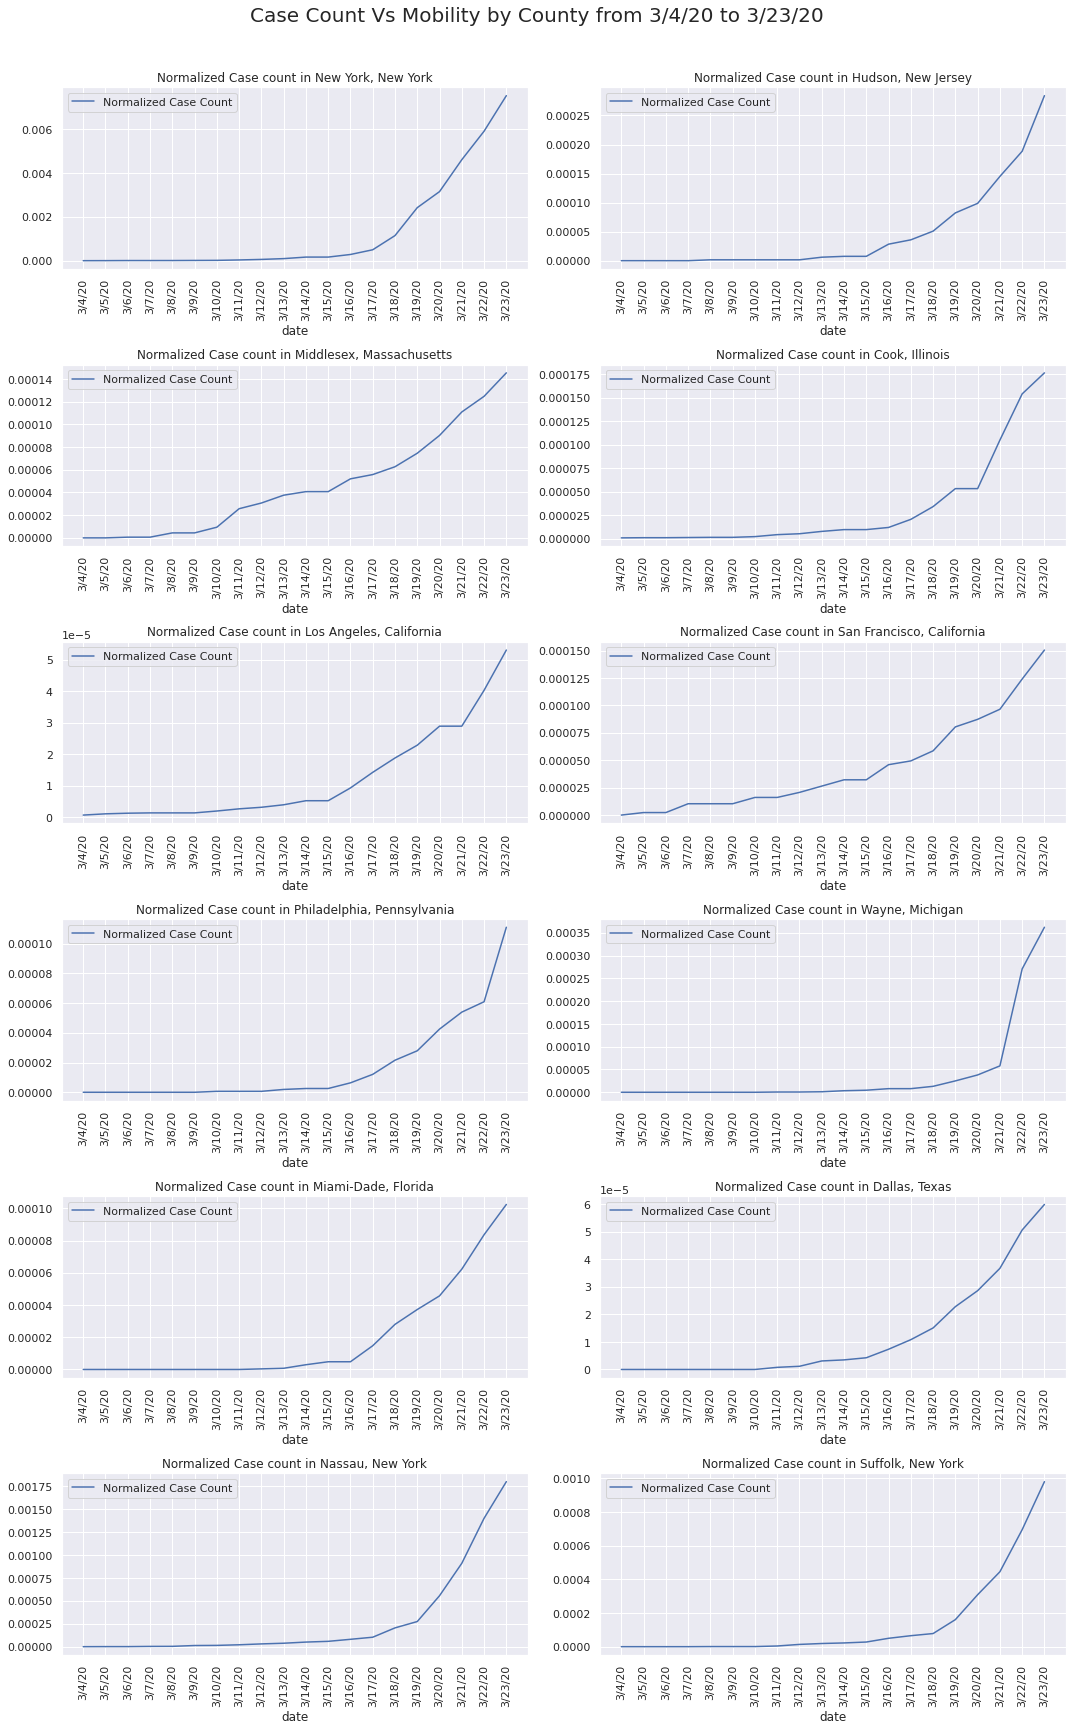

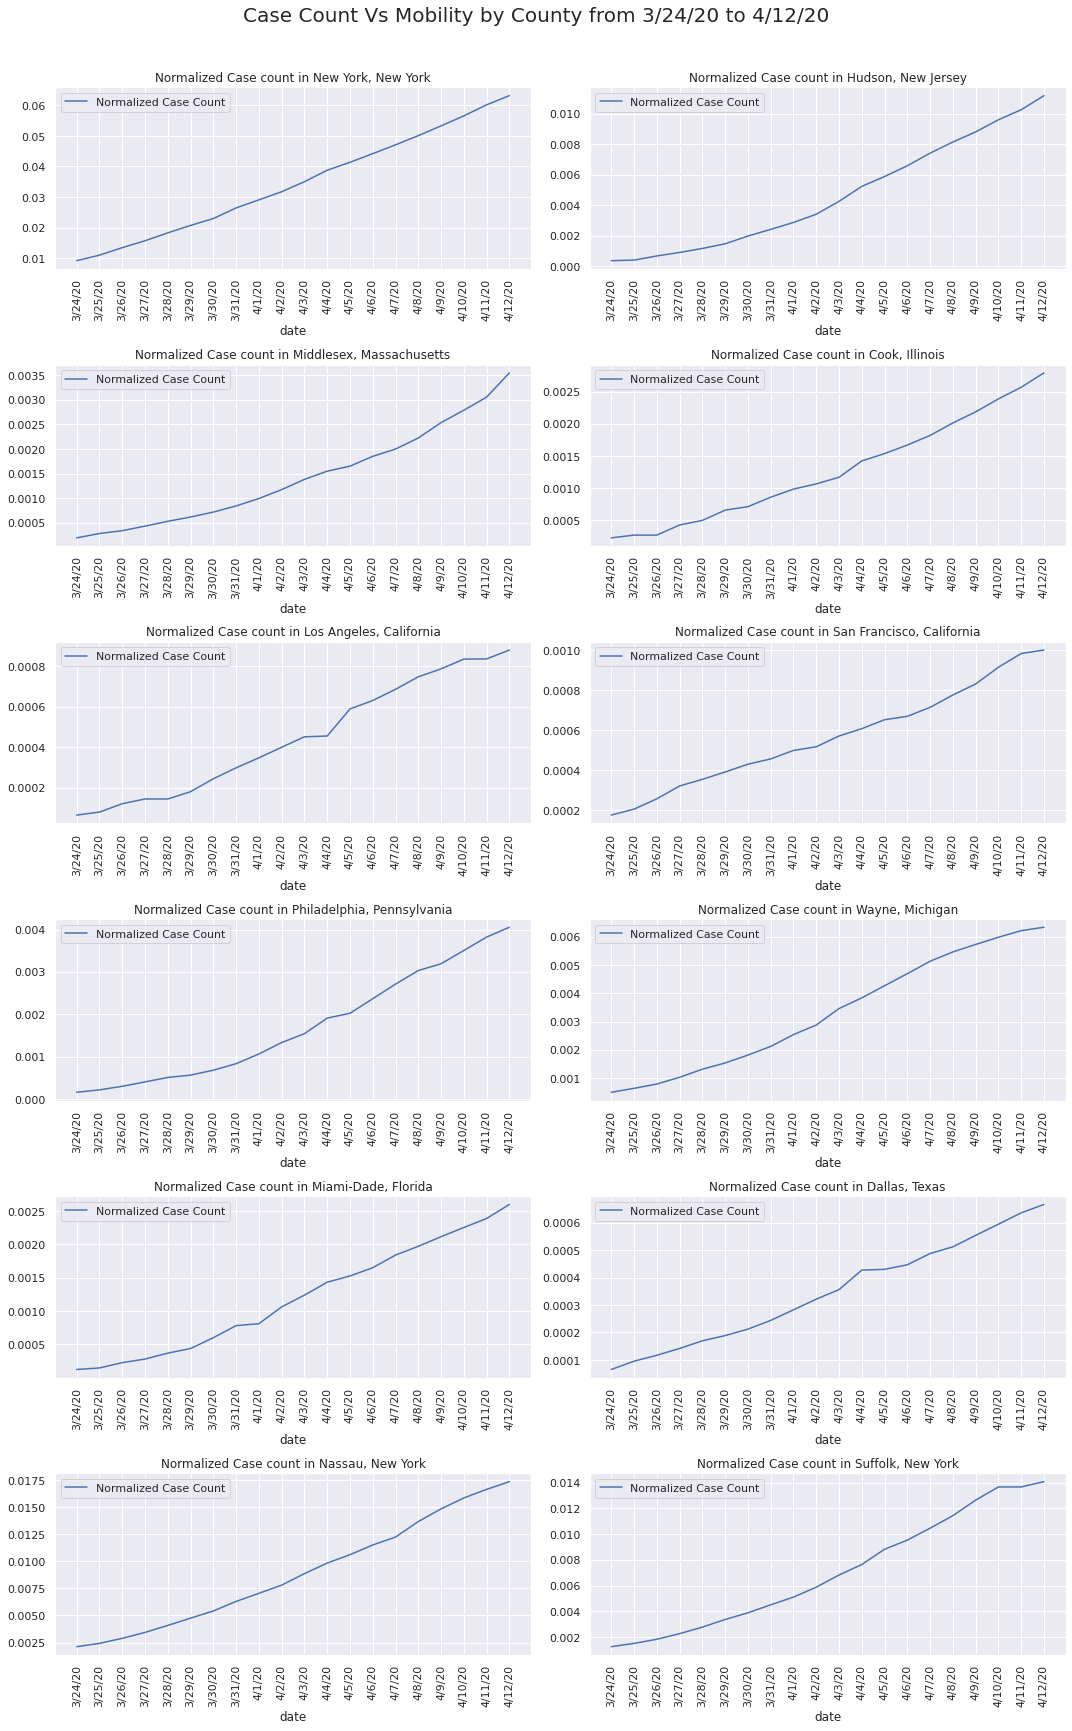

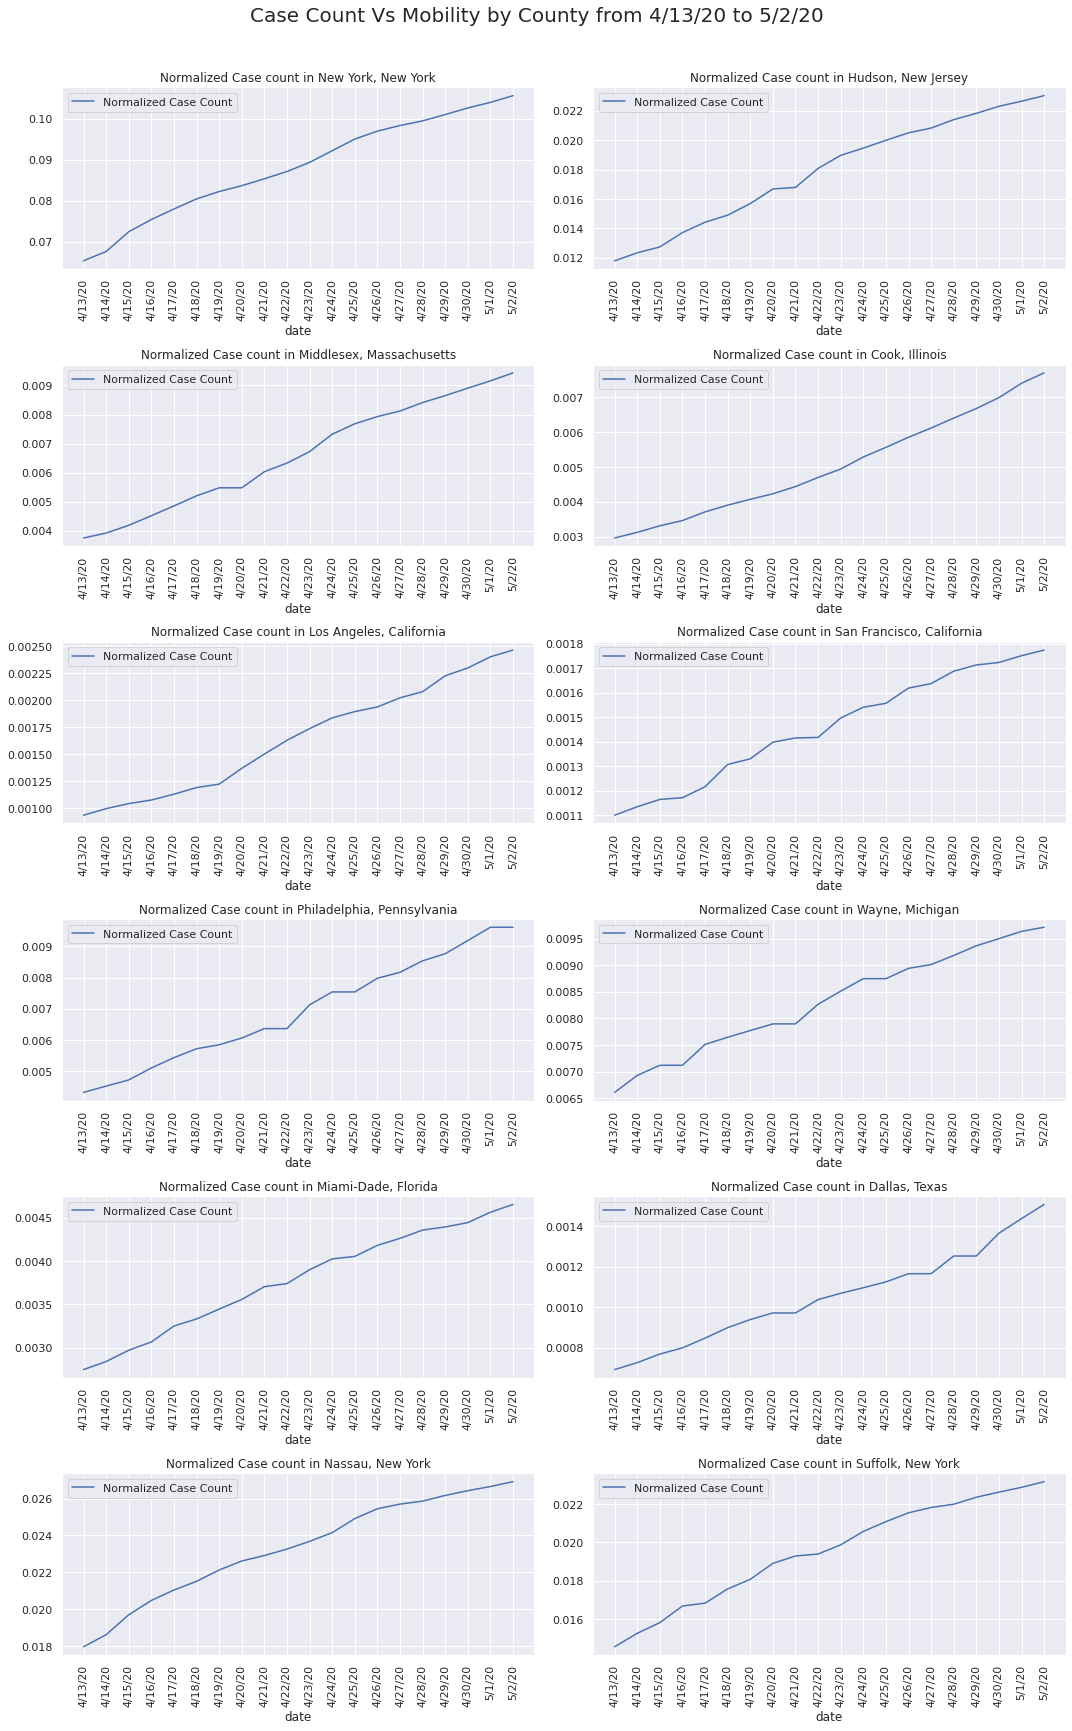

In [10]:
dates = [['3/4/20', '3/23/20'], ['3/24/20', '4/12/20'], ['4/13/20', '5/2/20']]

# Loop through this
Fips = [36061, 34017, 25017, 17031, 6037, 6075, 42101, 26163, 12086, 48113, 36059, 36103]
for j, date in enumerate(dates):
    fig, ax = plt.subplots(6,2, figsize=(15,25))
    ax = ax.flatten()
    for i, fips in enumerate(Fips):

        population = census.total_population.values[census.fips==fips]
        county = caseBycounty.loc[caseBycounty['FIPS'] == fips]
        ax[i].plot(county.loc[:, date[0]:date[1]].T/ population)
        case_slope = ((county[date[1]].values[0]-county[date[0]].values[0])/population/20)[0] # slop of case count during time period
        county_name = county.Admin2.values[0]
        state_name = county.Province_State.values[0]

        ax[i].set_xlabel('date')
    #     ax[i].set_ylabel('cases / population')
        ax[i].set_title(f'Normalized Case count in {county_name}, {state_name}')
        ax[i].legend(['Normalized Case Count','Detriot'])
        fig.suptitle(f'Case Count Vs Mobility by County from {date[0]} to {date[1]}', fontsize=20)

    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)

    fig.tight_layout(rect=[0, 0.02, 1, 0.95])

# Mobility Plots

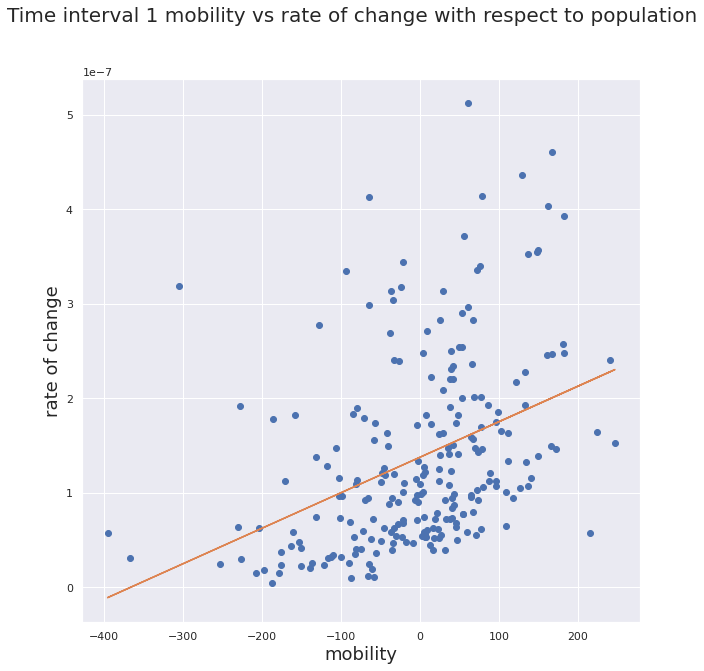

In [11]:
fig = plt.figure()

fig.suptitle('Time interval 1 mobility vs rate of change with respect to population', fontsize=20)
plt.xlabel('mobility', fontsize=18)
plt.ylabel('rate of change', fontsize=18)

fig.set_size_inches(10,10)

x = np.array(final_df['total_1'])

y = np.array(final_df['case1'])

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b);

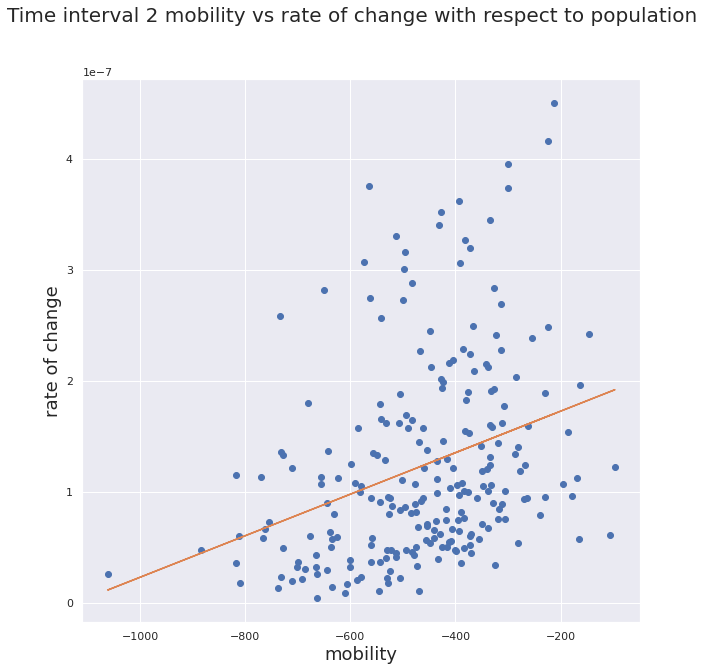

In [12]:
fig = plt.figure()

fig.suptitle('Time interval 2 mobility vs rate of change with respect to population', fontsize=20)
plt.xlabel('mobility', fontsize=18)
plt.ylabel('rate of change', fontsize=18)

fig.set_size_inches(10,10)

x = np.array(final_df['total_2'])

y = np.array(final_df['case2'])

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b);

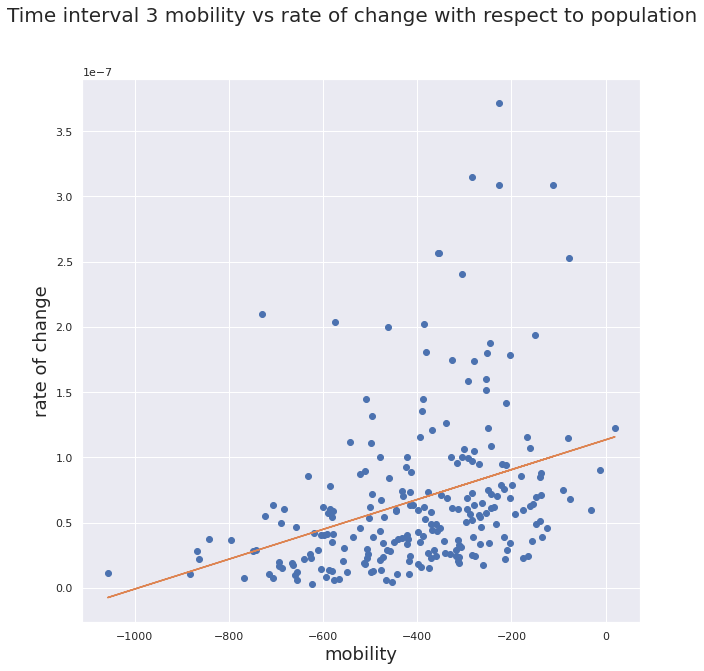

In [13]:
fig = plt.figure()

fig.suptitle('Time interval 3 mobility vs rate of change with respect to population', fontsize=20)
plt.xlabel('mobility', fontsize=18)
plt.ylabel('rate of change', fontsize=18)

fig.set_size_inches(10,10)

x = np.array(final_df['total_3'])

y = np.array(final_df['case3'])

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b);

In [0]:
census = pd.read_csv('https://raw.githubusercontent.com/GabrielBG010/Covid-County-Clustering/master/census_usa.csv')
census['county_name'] = census['name_x']
del census['name_x']

combined2 = census.merge(final_df, on='county_name', how='inner')
combined2 = combined2.dropna()

cluster_df = combined2.iloc[:, 1 :-86]
cluster_df_fips = combined2.iloc[:, 0 :-86]

#clustering goes here use cluster_df

# Feel free to delete anything up to the next header, 'function to plot clusters on map with regression lines'



It's important to get the sizing right so the dataframes line up so just run the clustering on cluster_df. Then after clustering it can be plotted by letting the color be the labeling and will work with the plots below.

In [0]:
x = cluster_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=cluster_df.columns)

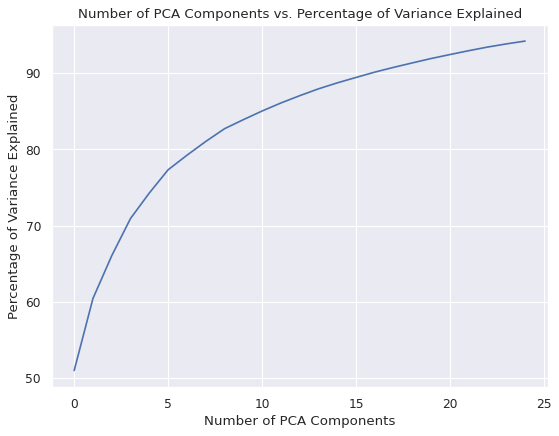

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

X = df
scores = []

for i in range(25):
  pca = PCA(n_components=i+2)
  pca.fit(X)
  X_pca = pca.transform(X)
  scores.append(round(sum(pca.explained_variance_ratio_)*100,3))
plt.xlabel('Number of PCA Components')
plt.ylabel('Percentage of Variance Explained')
plt.title('Number of PCA Components vs. Percentage of Variance Explained')
plt.plot(scores);

In [164]:
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print('Explained variance total: ' + str(round(sum(pca.explained_variance_ratio_)*100,3)) + '%')

original shape:    (224, 143)
transformed shape: (224, 20)
Explained variance total: 91.344%


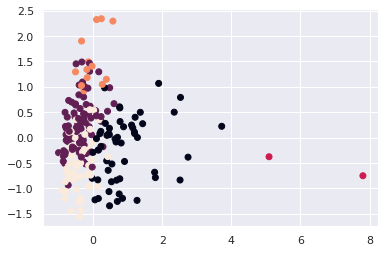

In [165]:
clustering = AgglomerativeClustering(5).fit(X_pca)
clustering.labels_
plt.scatter(X_pca[:, 0],X_pca[:, 1],c=clustering.labels_)

In [0]:
confirmed_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
death_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
confirmed_raw = confirmed_raw.set_index('FIPS')
death_raw = death_raw.set_index('FIPS')

In [0]:
death = death_raw.drop(death_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
death = death.reset_index().dropna()
death = death.astype({'FIPS': 'int32'})
death = death.set_index('FIPS')
d7 =  pd.DataFrame(death.T.diff().rolling(7).mean().mean(),columns=['death_rate'])

confirmed = confirmed_raw.drop(confirmed_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
confirmed = confirmed.reset_index().dropna()
confirmed = confirmed.astype({'FIPS': 'int32'})
confirmed = confirmed.set_index('FIPS')
c7 =  pd.DataFrame(confirmed.T.diff().rolling(7).mean().mean(),columns=['number_of_cases'])


In [0]:
cluster_df_fips = cluster_df_fips.set_index('fips_x')

In [0]:
final_df = cluster_df_fips.join(c7).join(d7).reset_index().drop(columns='fips_x')

In [0]:
def plot_heat_map(h):
  fig, ax = plt.subplots(figsize=(2,h.shape[0]//3))

  ax = sns.heatmap(
      h, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(240, 10, n=9),
      ax=ax
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right'
  );

In [0]:
final_df2 = final_df.copy()
lbl = np.array(clustering.labels_ )
for c in range(clustering.labels_.max()+1):
  final_df2["cluster"+str(c)] = np.where(lbl==c,1,0)

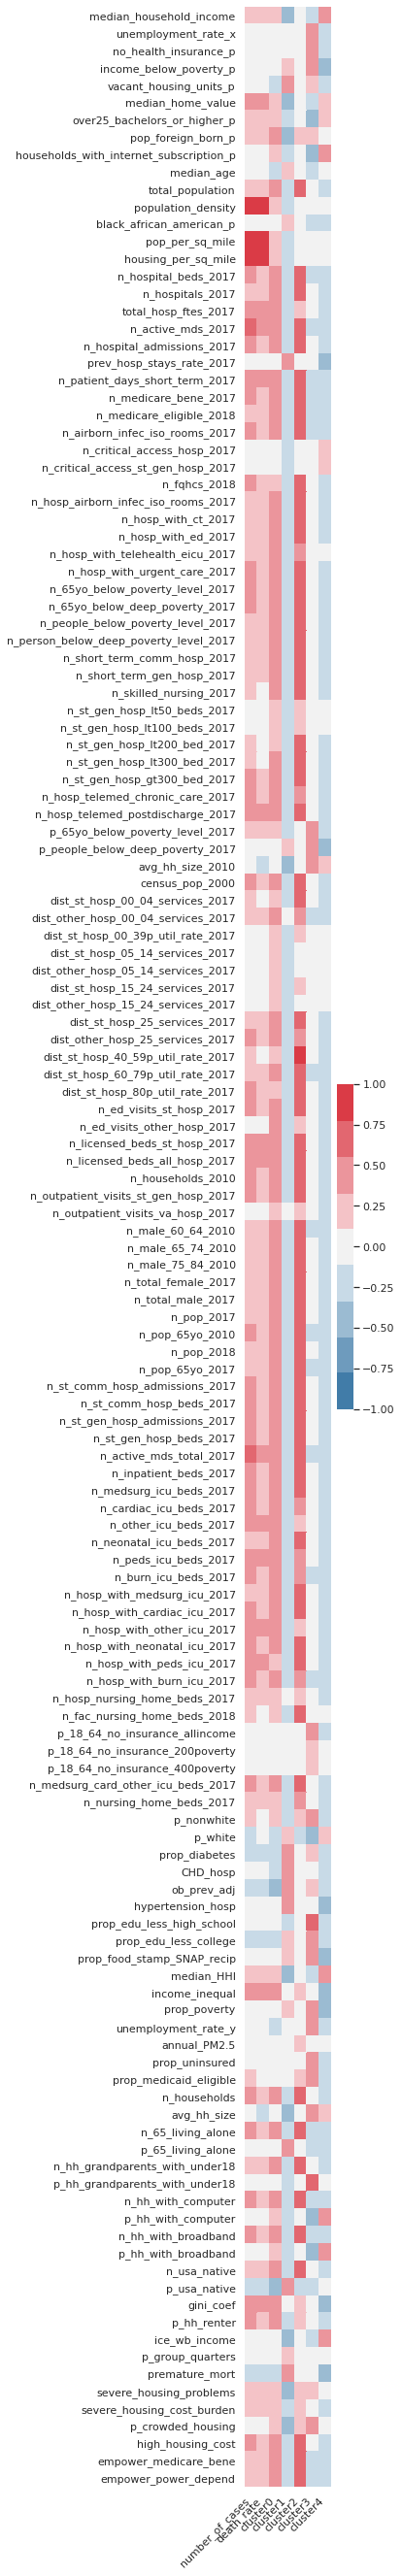

In [200]:
corr = final_df2.corr()
corr = corr.iloc[:-7,-7:]
plot_heat_map(corr)

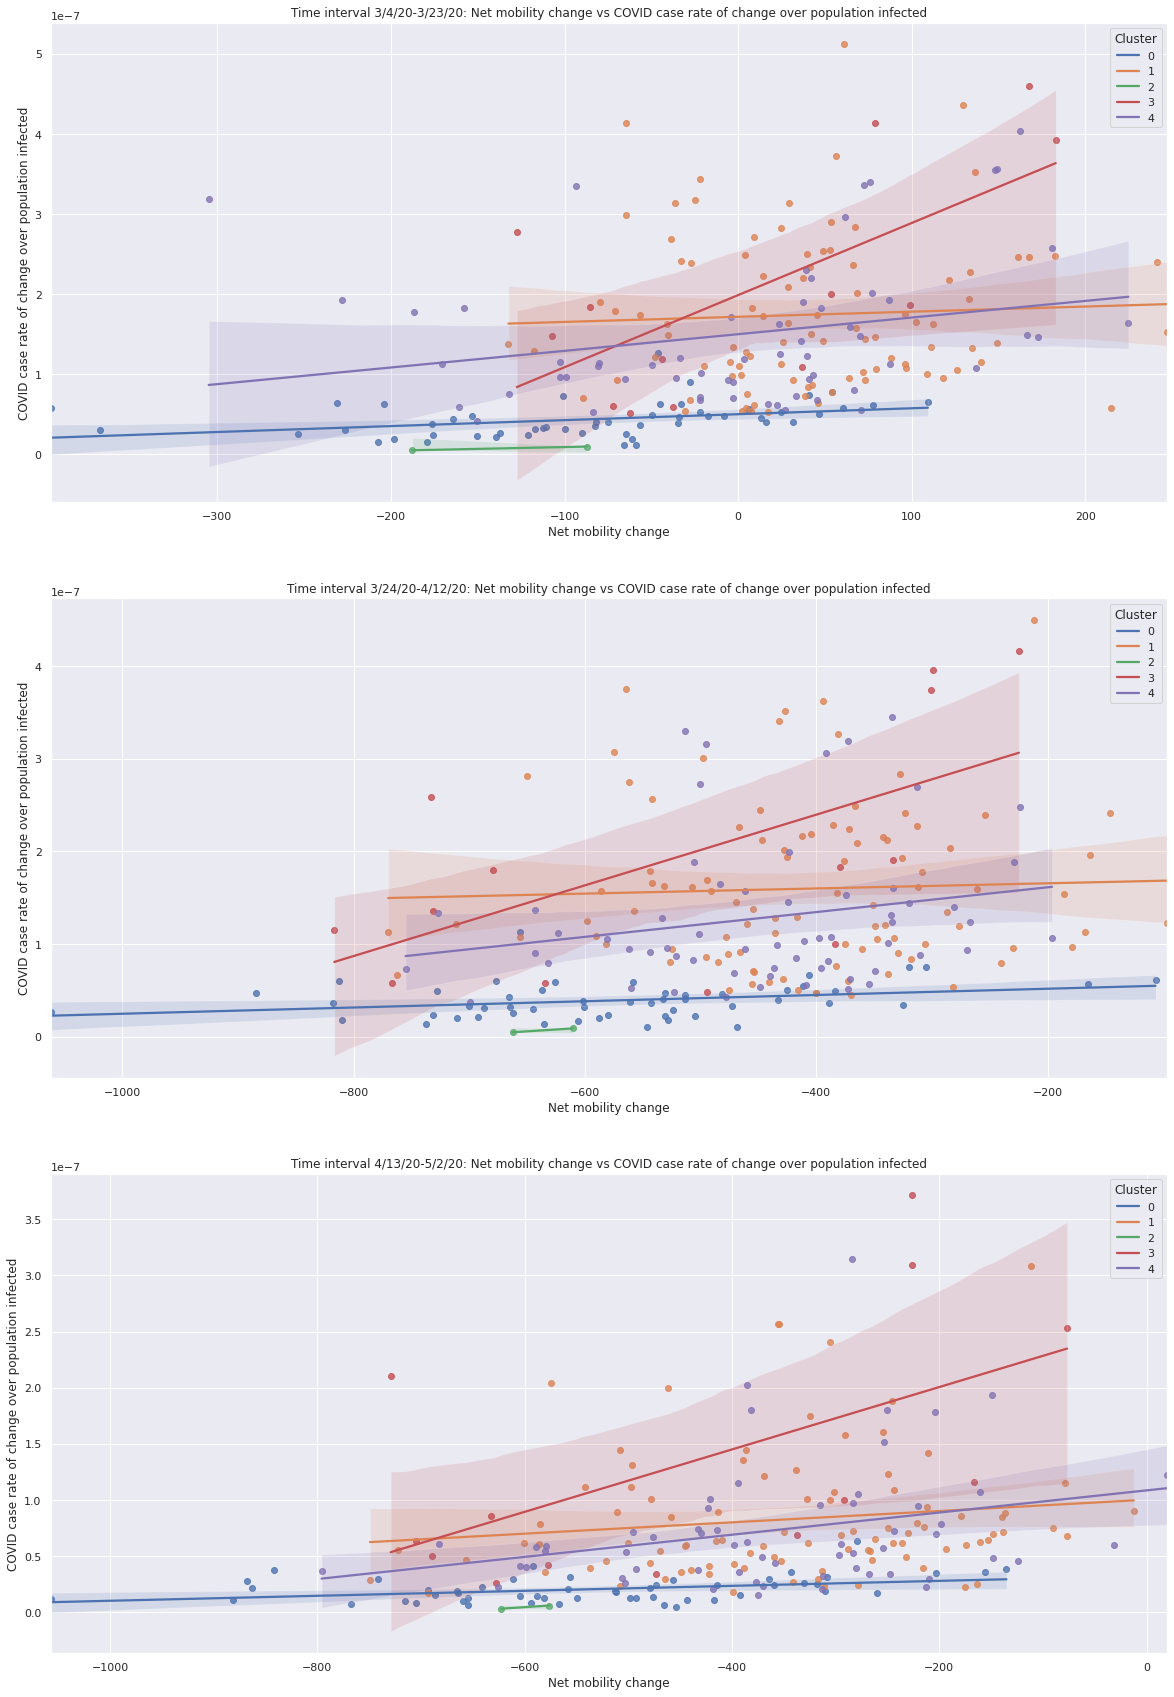

In [202]:
plot_clusters(lbl)

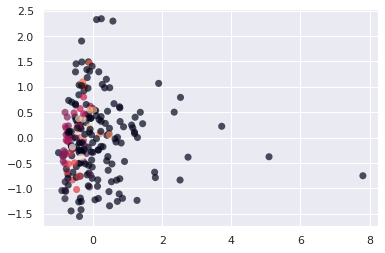

In [102]:
clustering = DBSCAN(eps=.6, min_samples=2).fit(X_pca)
label = clustering.labels_  
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k',c=label)

In [104]:
label.max()

11

# function to plot clusters on map with regression lines

In [0]:
import seaborn as sns; sns.set(color_codes=True)

def plot_clusters(labels):
  mobile = ['total_1','total_2','total_3']
  dates = ['3/4/20-3/23/20', '3/24/20-4/12/20', '4/13/20-5/2/20']
  cases = ['case1','case2','case3']

  fig, axes = plt.subplots(3,1,figsize=(20,30))

  combined2['clusters'] = labels

  grouped = combined2.groupby('clusters')

  for i in range(3):
    for name, group in grouped:
      x = np.array(group[mobile[i]])
      y = np.array(group[cases[i]])

      axes[i].set_title('Time interval ' +  dates[i]  +  ': Net mobility change vs COVID case rate of change over population infected')
      sns.regplot(x=mobile[i], y=cases[i], data=group, ax=axes[i])
      axes[i].set_xlabel('Net mobility change')
      axes[i].set_ylabel('COVID case rate of change over population infected')

    
    axes[i].legend(range(name+1),title='Cluster', fancybox=True, loc="upper right")


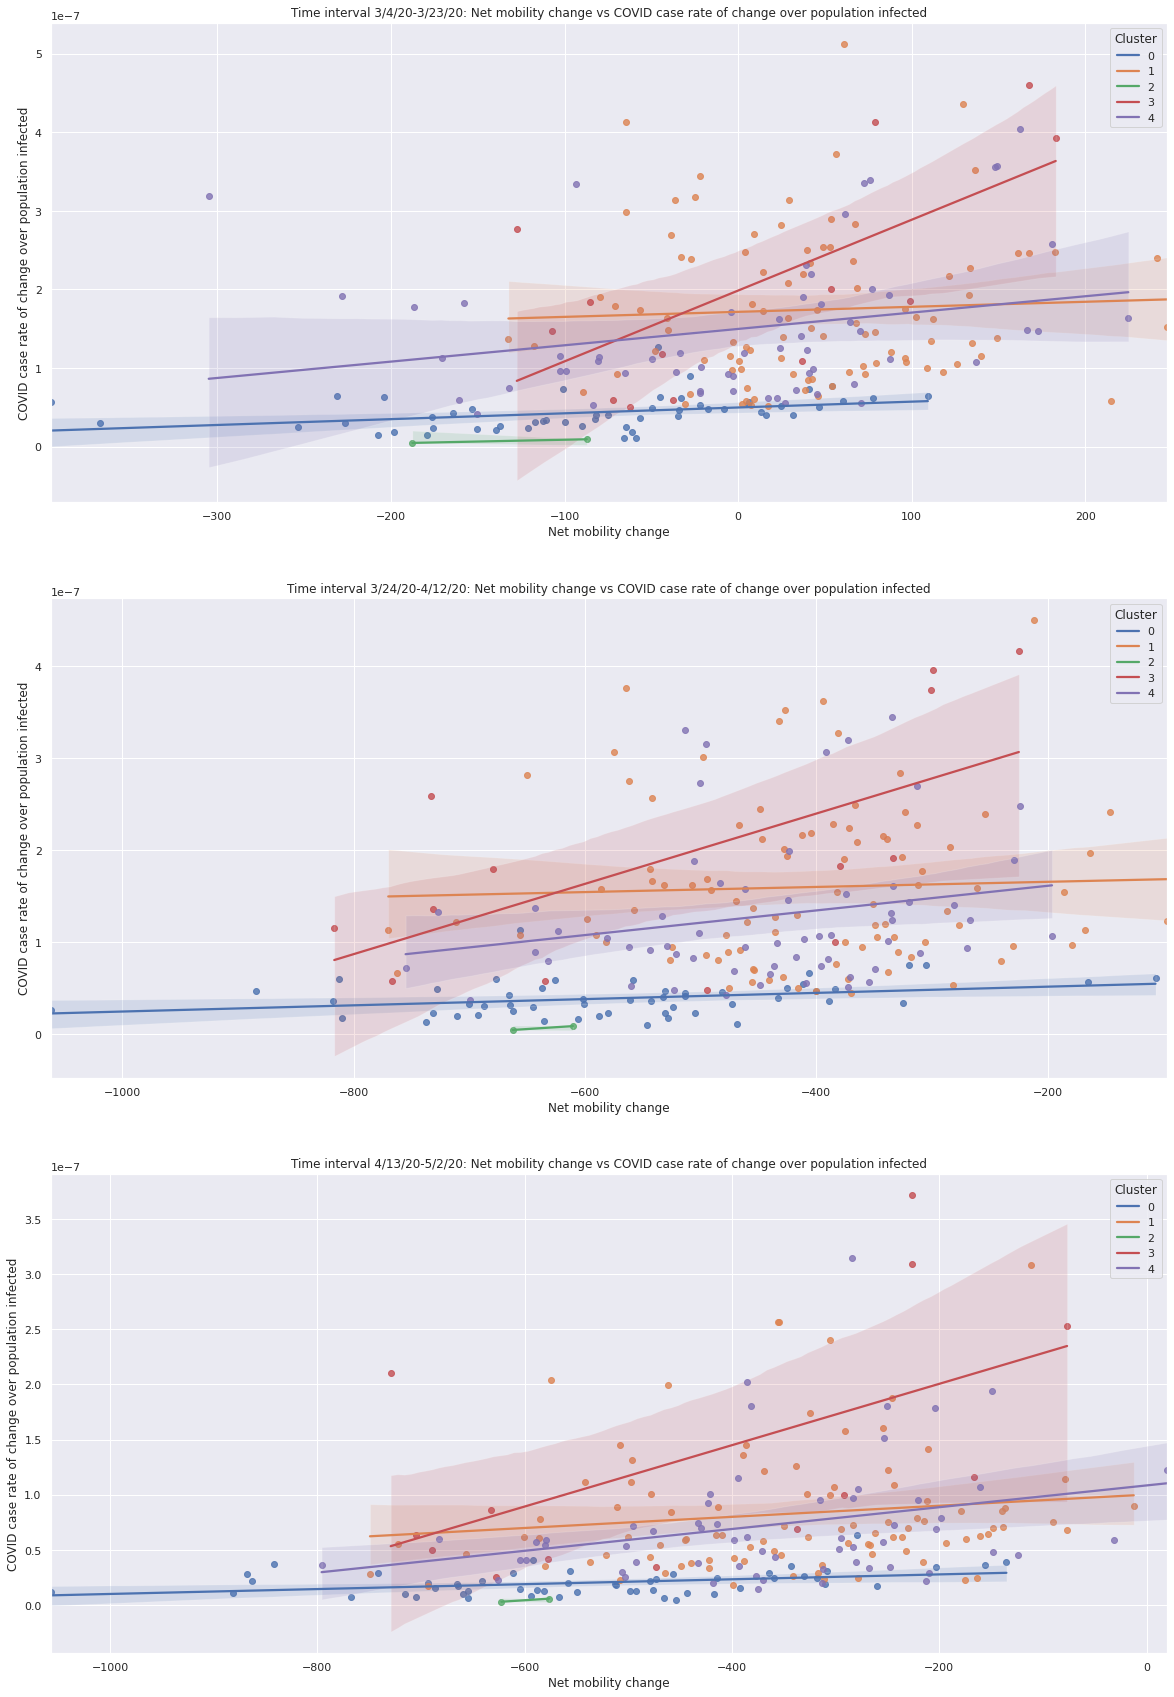

In [21]:
plot_clusters(clustering.labels_)